<a href="https://colab.research.google.com/github/FouziyaHabeeb/Disease-Prediction/blob/main/skin_desease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skin Disease Classification Using different Clssification Algortithm


Skin disease dataste is loaded to the environment

In [ ]:
import pandas as pd
skin = pd.read_csv('/content/skncon.csv')
print(skin)

      Unnamed: 0                               ImageID  Vesicle  Papule  \
0              0  eb0cbb277ba6b206c5fafc66ab8c46f9.jpg        0       0   
1              1  bb3d08781eb23890a9909201deed8c85.jpg        0       0   
2              2  4cb78451164b8f957352b9484c63c7a3.jpg        0       1   
3              3  a82ebeac11078ba3722e5eefb6a35661.jpg        0       0   
4              4  2753aae451d232c73026a18fa18d9a64.jpg        0       0   
...          ...                                   ...      ...     ...   
3685        3985  005b804472c7a27908f99e3d6d6cf91c.jpg        0       0   
3686        3986  92afd771a20a081d0ba107e26ae8ad99.jpg        0       0   
3687        3987  82085785a352ba6331ba8556f3b7d309.jpg        0       0   
3688        3988  76b8bdafb5e609b9f5cb381d52d365da.jpg        1       0   
3689        3989  864ec9490d1452c684109547a04b968c.jpg        0       0   

      Macule  Plaque  Abscess  Pustule  Bulla  Patch  ...  Umbilicated  \
0          0       0     

The dtaset is described to find out the values and its mean median clearly

In [ ]:
skin.describe()


,Unnamed: 0,Vesicle,Papule,Macule,Plaque,Abscess,Pustule,Bulla,Patch,Nodule,...,Umbilicated,Poikiloderma,Salmon,Wheal,Acuminate,Burrow,Gray,Pigmented,Cyst,Do not consider this image
count,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,...,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000
mean,2090.841463,0.012466,0.317073,0.003523,0.533062,0.001355,0.027913,0.017344,0.040379,0.051220,...,0.013279,0.001355,0.002710,0.005691,0.002168,0.001355,0.001355,0.001355,0.001626,0.124661
std,1124.247895,0.110969,0.465399,0.059259,0.498973,0.036791,0.164747,0.130568,0.196874,0.220475,...,0.114483,0.036791,0.051994,0.075234,0.046518,0.036791,0.036791,0.036791,0.040297,0.330379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1102.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2144.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3066.750000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3989.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For classification purpose and easy handling of the data only the first 20 columns are taken.

In [ ]:
skin[0:20]

,Unnamed: 0,ImageID,Vesicle,Papule,Macule,Plaque,Abscess,Pustule,Bulla,Patch,...,Umbilicated,Poikiloderma,Salmon,Wheal,Acuminate,Burrow,Gray,Pigmented,Cyst,Do not consider this image
0,0,eb0cbb277ba6b206c5fafc66ab8c46f9.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,bb3d08781eb23890a9909201deed8c85.jpg,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4cb78451164b8f957352b9484c63c7a3.jpg,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,a82ebeac11078ba3722e5eefb6a35661.jpg,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,2753aae451d232c73026a18fa18d9a64.jpg,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,f70e72f6ad04c837d63613cf9295bba0.jpg,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,4953e564460dbe32e48a21dcff8f6445.jpg,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,61476bff344f64f26b8a946403681ffb.jpg,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,3adf3f54ab944f94b9a9d0072dd11c7a.jpg,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,9,518f1b72caa5718bb84cc769631656b3.jpg,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After getting the 20 values of the data. The datset is cleaned.
The unwanted columns from the dtataset are droped.

In [ ]:
skin1= skin.drop(columns='Unnamed: 0')
skin1[0:20]

,ImageID,Vesicle,Papule,Macule,Plaque,Abscess,Pustule,Bulla,Patch,Nodule,...,Umbilicated,Poikiloderma,Salmon,Wheal,Acuminate,Burrow,Gray,Pigmented,Cyst,Do not consider this image
0,eb0cbb277ba6b206c5fafc66ab8c46f9.jpg,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,bb3d08781eb23890a9909201deed8c85.jpg,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4cb78451164b8f957352b9484c63c7a3.jpg,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,a82ebeac11078ba3722e5eefb6a35661.jpg,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2753aae451d232c73026a18fa18d9a64.jpg,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,f70e72f6ad04c837d63613cf9295bba0.jpg,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4953e564460dbe32e48a21dcff8f6445.jpg,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,61476bff344f64f26b8a946403681ffb.jpg,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3adf3f54ab944f94b9a9d0072dd11c7a.jpg,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,518f1b72caa5718bb84cc769631656b3.jpg,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
skinn= skin1.drop(columns=[ 'Do not consider this image', 'ImageID' ])
skinn[0:20]

,Vesicle,Papule,Macule,Plaque,Abscess,Pustule,Bulla,Patch,Nodule,Ulcer,...,Blue,Umbilicated,Poikiloderma,Salmon,Wheal,Acuminate,Burrow,Gray,Pigmented,Cyst
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


All the bnecessary libraries are included.

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,recall_score,accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier



The correlation of the cleaned data is calculated and the hea tmap is drawn.

<Axes: title={'center': 'Correlation'}>

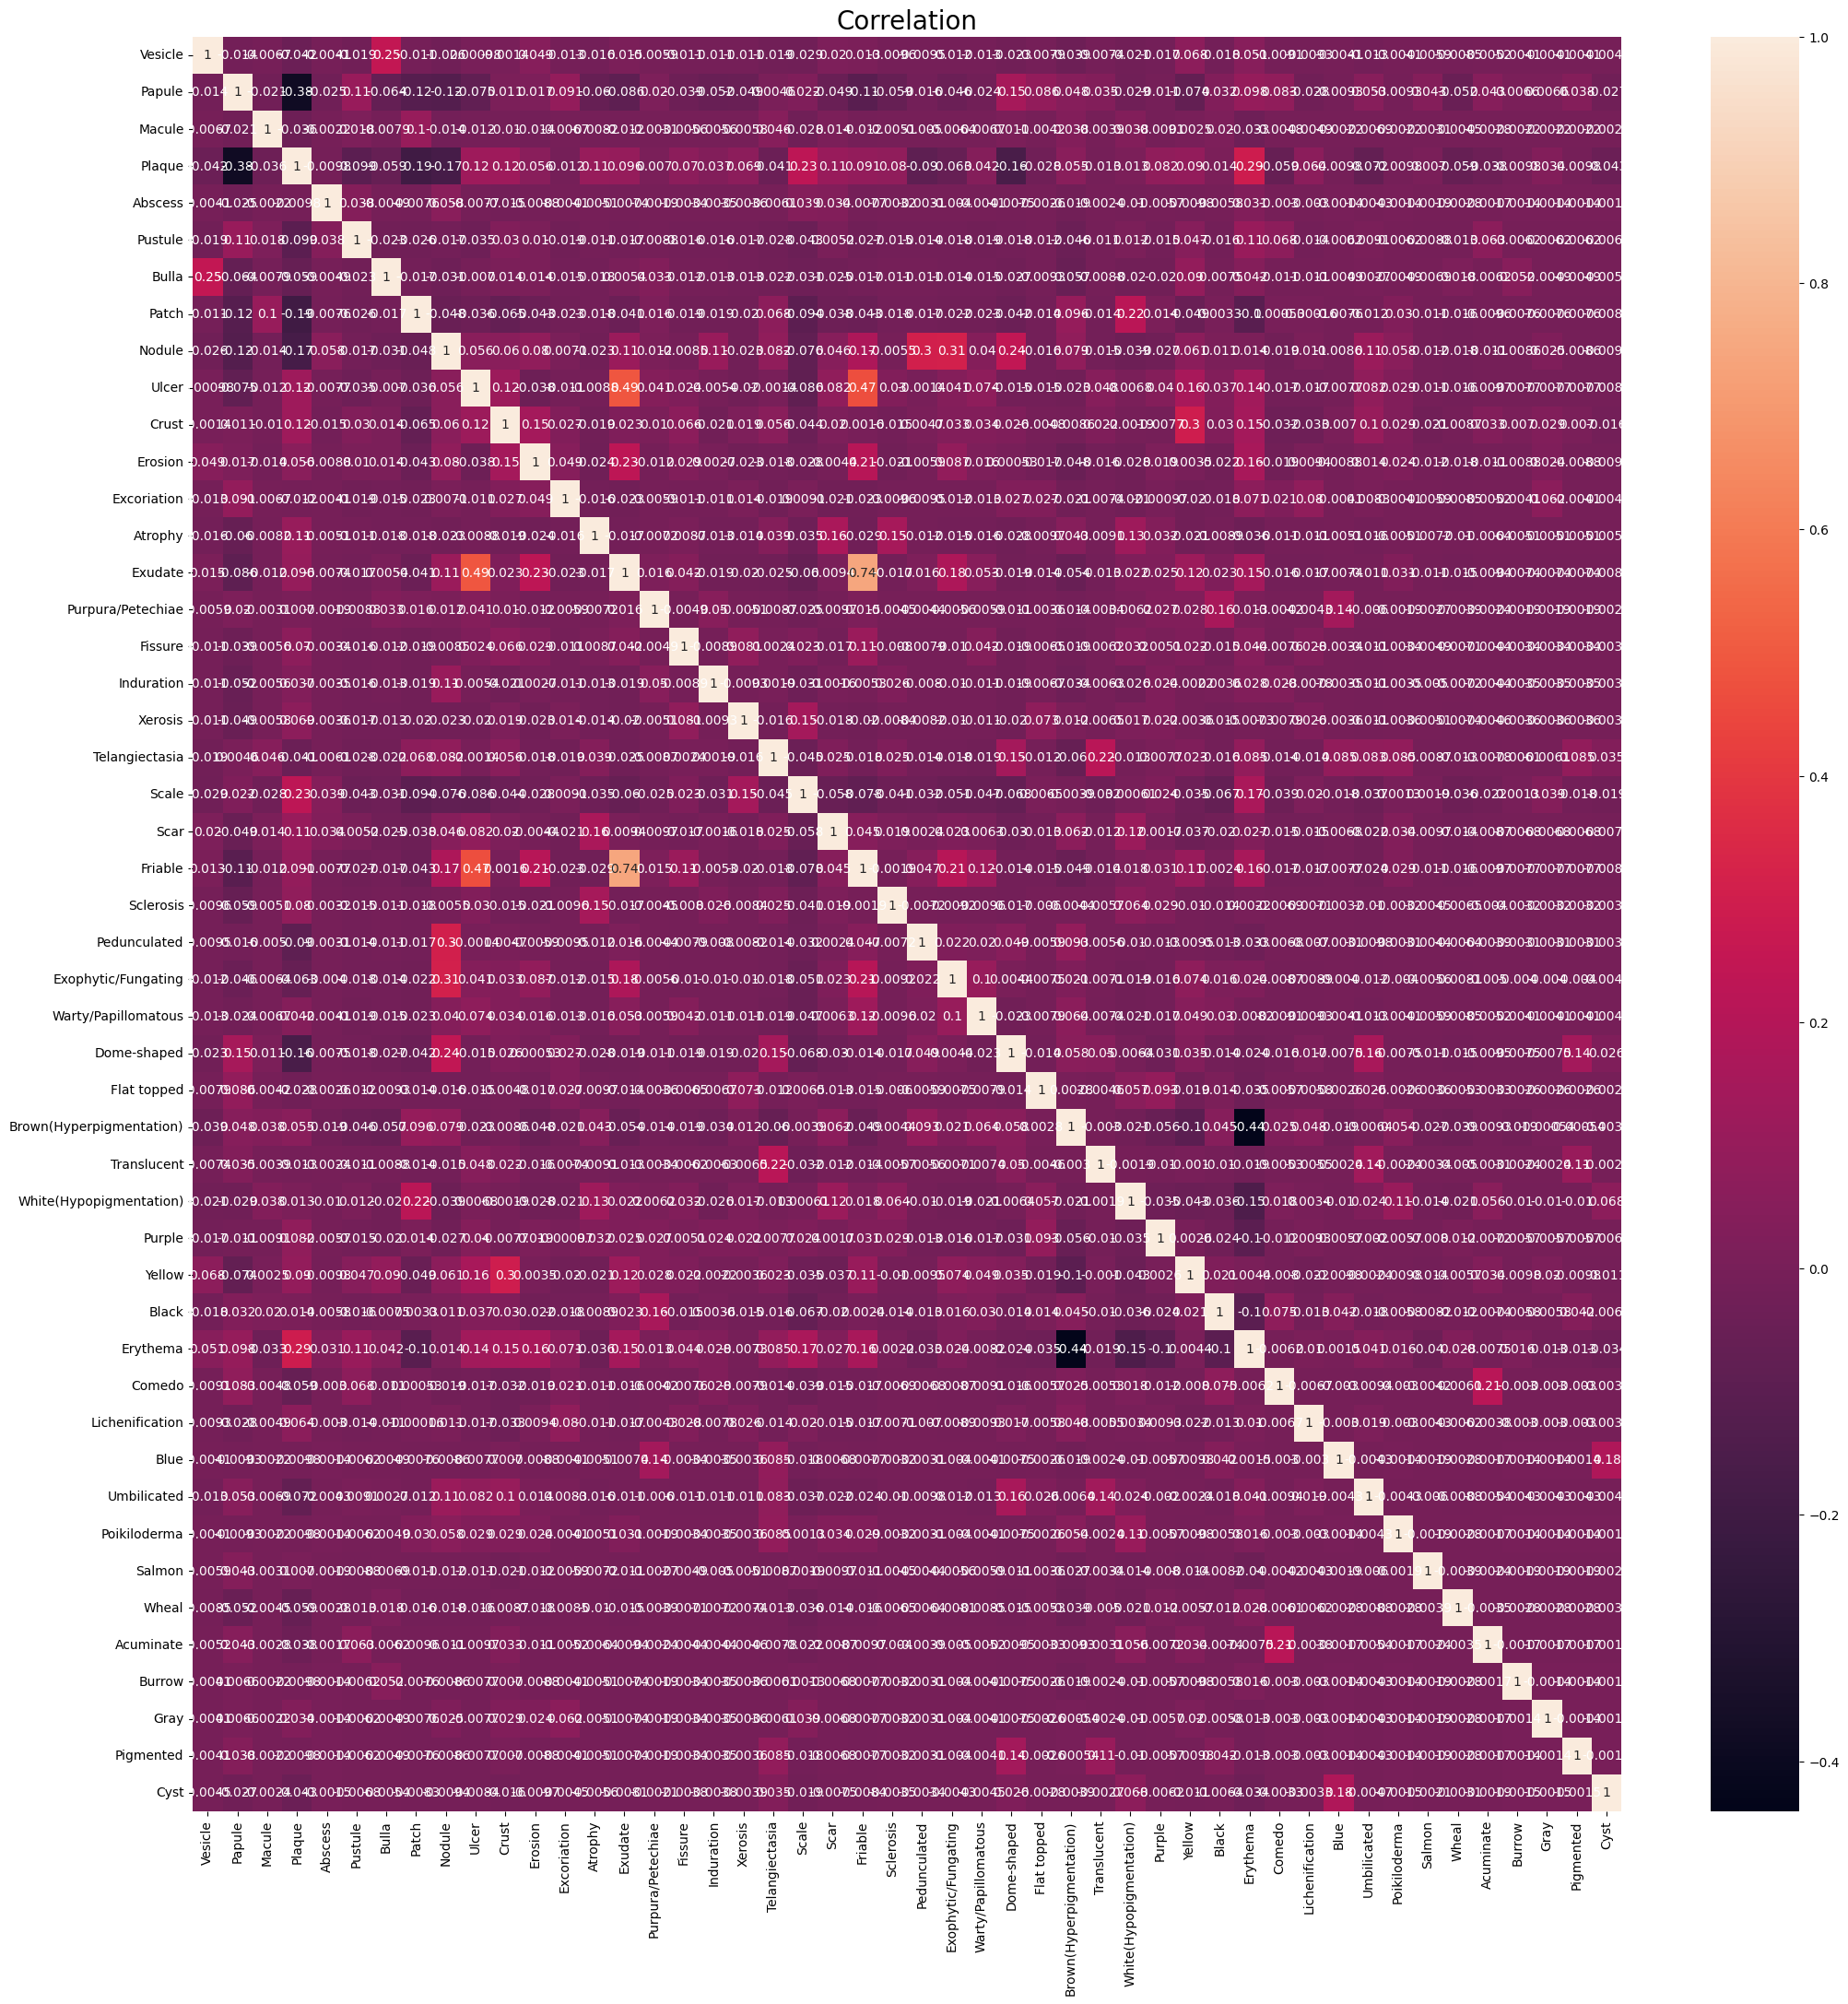

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,25))
plt.title("Correlation", fontsize=20)
sns.heatmap(skinn.corr(),annot=True, linecolor='white')

After the heat map is created there the data is then split into test and train data based on any criteria which can be considered positive.

In [ ]:
X_train, X_test = train_test_split(skinn, test_size=0.2, random_state=42)

Y_train = X_train.loc[:,'Cyst']
Y_train

1011    0
1178    0
96      0
43      0
2592    0
       ..
1130    0
1294    0
860     0
3507    0
3174    0
Name: Cyst, Length: 2952, dtype: int64

In [ ]:
Y_test = X_test.loc[:,'Cyst']
Y_test


3557    0
3601    0
490     0
921     0
2972    0
       ..
809     0
3553    0
2575    0
3612    0
1157    0
Name: Cyst, Length: 738, dtype: int64

In [ ]:
X_train.drop(columns=['Cyst'], inplace=True)
X_train

,Vesicle,Papule,Macule,Plaque,Abscess,Pustule,Bulla,Patch,Nodule,Ulcer,...,Lichenification,Blue,Umbilicated,Poikiloderma,Salmon,Wheal,Acuminate,Burrow,Gray,Pigmented
1011,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1178,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2592,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.drop(columns=['Cyst'], inplace=True)
X_test

,Vesicle,Papule,Macule,Plaque,Abscess,Pustule,Bulla,Patch,Nodule,Ulcer,...,Lichenification,Blue,Umbilicated,Poikiloderma,Salmon,Wheal,Acuminate,Burrow,Gray,Pigmented
3557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3601,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2972,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3553,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2575,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3612,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


After the data is split into train and test then it is fitted into the mode for classification.
After it is calculated the classifiers are used to find the performance of the classifier using various performance metrix

In [ ]:
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,Y_train)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(X_test)
print('confusion matrix')
print(metrics.confusion_matrix(Y_test, ypredrf))
print('classification report')
print(metrics.classification_report(Y_test, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(Y_test, ypredrf)))

model
RandomForestClassifier()
confusion matrix
[[737   1]
 [  0   0]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       738
           1       0.00      0.00      0.00         0

    accuracy                           1.00       738
   macro avg       0.50      0.50      0.50       738
weighted avg       1.00      1.00      1.00       738

Accuracy : 0.998645


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics

lgmodel = LogisticRegression()
lgmodel.fit(X_train,Y_train)
print('model')
print(lgmodel)

ypredlg = lgmodel.predict(X_test)
print('confusion matrix')
print(metrics.confusion_matrix(Y_test, ypredlg))
print('classification report')
print(metrics.classification_report(Y_test, ypredlg))
print('Accuracy : %f' % (metrics.accuracy_score(Y_test, ypredlg)))

model
LogisticRegression()
confusion matrix
[[738]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       738

    accuracy                           1.00       738
   macro avg       1.00      1.00      1.00       738
weighted avg       1.00      1.00      1.00       738

Accuracy : 1.000000


In [ ]:
from sklearn import metrics

DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train,Y_train)
print('model')
print(DTmodel)

ypredDT = DTmodel.predict(X_test)
print('confusion matrix')
print(metrics.confusion_matrix(Y_test, ypredDT))
print('classification report')
print(metrics.classification_report(Y_test, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(Y_test, ypredrf)))

model
DecisionTreeClassifier()
confusion matrix
[[737   1]
 [  0   0]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       738
           1       0.00      0.00      0.00         0

    accuracy                           1.00       738
   macro avg       0.50      0.50      0.50       738
weighted avg       1.00      1.00      1.00       738

Accuracy : 0.998645


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics

knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train,Y_train)
print('model')
print(knnmodel)

ypredknn = knnmodel.predict(X_test)
print('confusion matrix')
print(metrics.confusion_matrix(Y_test, ypredknn))
print('classification report')
print(metrics.classification_report(Y_test, ypredknn))
print('Accuracy : %f' % (metrics.accuracy_score(Y_test, ypredknn)))

model
KNeighborsClassifier()
confusion matrix
[[738]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       738

    accuracy                           1.00       738
   macro avg       1.00      1.00      1.00       738
weighted avg       1.00      1.00      1.00       738

Accuracy : 1.000000
